<a href="https://colab.research.google.com/github/mehraj-alom/Deep_learrning/blob/main/transfer_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Training data shape: (2000, 32, 32, 3)
Training labels shape: (2000,)
Test data shape: (400, 32, 32, 3)
Test labels shape: (400,)
Preprocessed training data shape: (2000, 224, 224, 3)
Preprocessed test data shape: (400, 224, 224, 3)


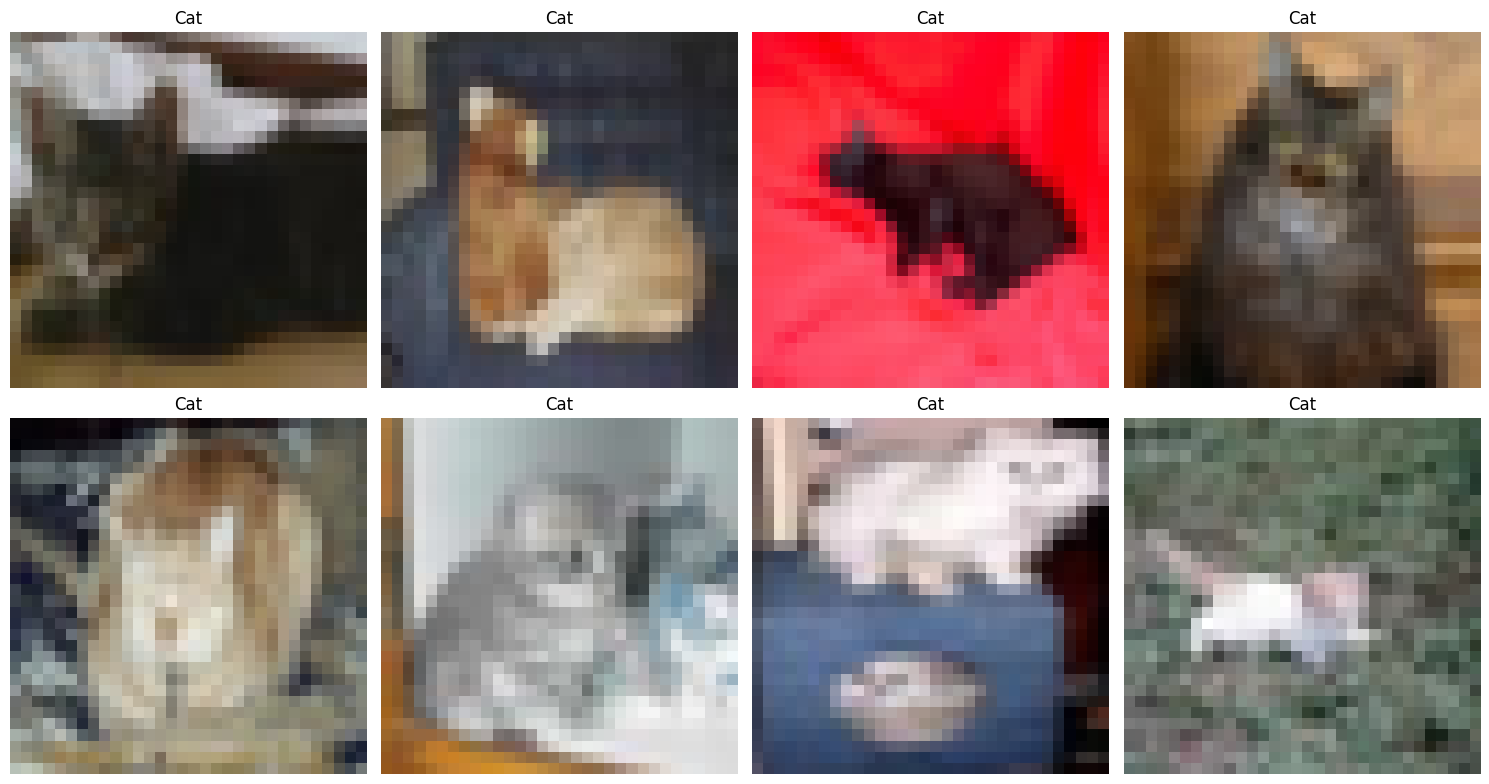

Base model has 175 layers
Base model output shape: (None, 7, 7, 2048)

MODEL ARCHITECTURE


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Model compiled with learning rate: 0.0001

PHASE 1: FEATURE EXTRACTION TRAINING
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 267ms/step - accuracy: 0.5121 - loss: 0.7180 - precision: 0.4747 - recall: 0.1326 - val_accuracy: 0.5100 - val_loss: 0.6932 - val_precision: 0.5056 - val_recall: 0.9100 - learning_rate: 1.0000e-04
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.5197 - loss: 0.6985 - precision: 0.5044 - recall: 0.5044 - val_accuracy: 0.5000 - val_loss: 0.6933 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.4994 - loss: 0.7034 - precision: 0.4831 - recall: 0.4906 - val_accuracy: 0.5000 - val_loss: 0.6934 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5136 - loss: 0.7015 - precision: 0.4986 - recall: 0.5127 - val_accuracy: 0.5000 - val_loss: 0.6933 - val_precision: 0.5000 - val_recall: 1.

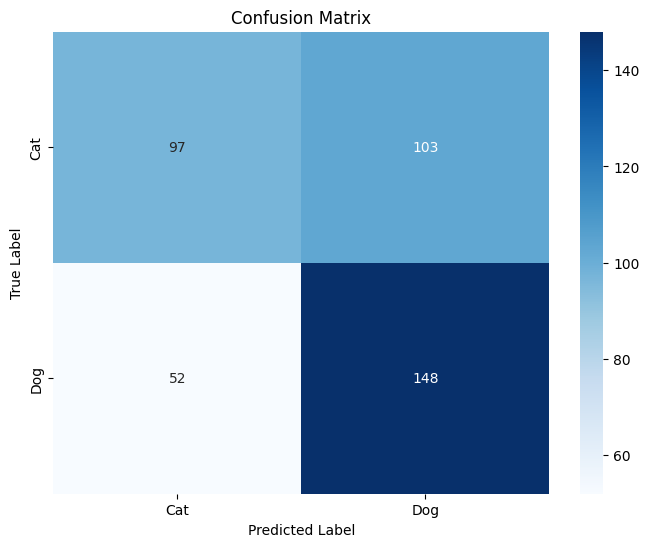

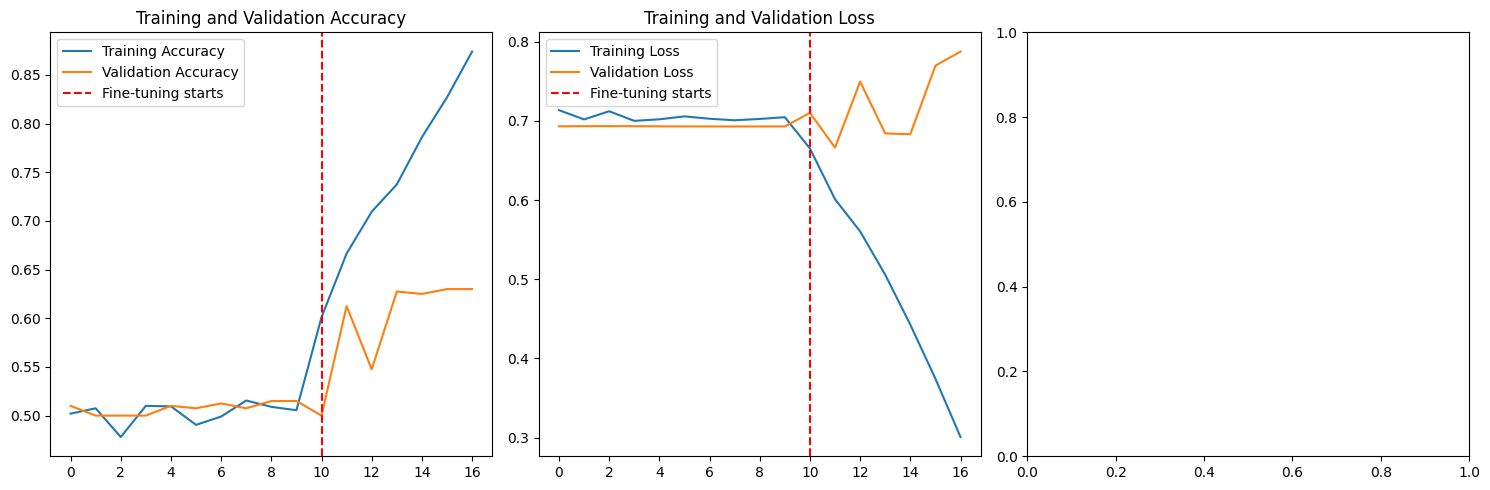


SAMPLE PREDICTIONS
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image 1: True=Cat, Predicted=Dog, Confidence=0.8327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image 2: True=Cat, Predicted=Dog, Confidence=0.8354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image 3: True=Cat, Predicted=Dog, Confidence=0.8383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image 4: True=Cat, Predicted=Dog, Confidence=0.8384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image 5: True=Cat, Predicted=Dog, Confidence=0.8355


In [ ]:
# Complete Transfer Learning Tutorial with Image Classification
# This example uses a pre-trained ResNet50 model for classifying cats vs dogs

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
from PIL import Image
import requests
from io import BytesIO

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# =============================================================================
# STEP 1: DATA PREPARATION
# =============================================================================

# Create sample data directory structure
def create_sample_data():
    """
    Creates sample data for demonstration.
    In practice, you'd organize your data in folders like:
    data/
    ├── train/
    │   ├── cats/
    │   └── dogs/
    └── validation/
        ├── cats/
        └── dogs/
    """

    # For this example, we'll use tf.keras.utils.get_file to download sample images
    # or create synthetic data for demonstration

    # Create directories
    os.makedirs('data/train/cats', exist_ok=True)
    os.makedirs('data/train/dogs', exist_ok=True)
    os.makedirs('data/validation/cats', exist_ok=True)
    os.makedirs('data/validation/dogs', exist_ok=True)

    print("Sample data structure created!")
    print("In practice, place your images in the appropriate folders.")

# For this tutorial, we'll use a built-in dataset
def load_sample_dataset():
    """
    Load a sample dataset for demonstration.
    We'll use CIFAR-10 and filter for cats and dogs.
    """

    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # Filter for cats (class 3) and dogs (class 5)
    cat_indices = np.where(y_train == 3)[0]
    dog_indices = np.where(y_train == 5)[0]

    # Take first 1000 samples of each class for faster training
    cat_indices = cat_indices[:1000]
    dog_indices = dog_indices[:1000]

    # Combine and create binary labels (0 for cats, 1 for dogs)
    train_indices = np.concatenate([cat_indices, dog_indices])
    x_train_filtered = x_train[train_indices]
    y_train_filtered = np.concatenate([np.zeros(len(cat_indices)),
                                      np.ones(len(dog_indices))])

    # Do the same for test data
    cat_indices_test = np.where(y_test == 3)[0][:200]
    dog_indices_test = np.where(y_test == 5)[0][:200]

    test_indices = np.concatenate([cat_indices_test, dog_indices_test])
    x_test_filtered = x_test[test_indices]
    y_test_filtered = np.concatenate([np.zeros(len(cat_indices_test)),
                                     np.ones(len(dog_indices_test))])

    return (x_train_filtered, y_train_filtered), (x_test_filtered, y_test_filtered)

# Load the dataset
(x_train, y_train), (x_test, y_test) = load_sample_dataset()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# =============================================================================
# STEP 2: DATA PREPROCESSING
# =============================================================================

def preprocess_data(x_train, x_test, target_size=(224, 224)):
    """
    Preprocess the data for transfer learning.
    - Resize images to match pre-trained model input size
    - Normalize pixel values
    - Convert to float32
    """

    # Convert to float32 and normalize to [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Resize images to target size using TensorFlow operations
    x_train = tf.image.resize(x_train, target_size)
    x_test = tf.image.resize(x_test, target_size)

    # Pre-trained models expect specific input preprocessing
    # For ResNet50, we need to use preprocess_input
    x_train = keras.applications.resnet50.preprocess_input(x_train)
    x_test = keras.applications.resnet50.preprocess_input(x_test)

    return x_train, x_test

# Preprocess the data
x_train, x_test = preprocess_data(x_train, x_test)

print(f"Preprocessed training data shape: {x_train.shape}")
print(f"Preprocessed test data shape: {x_test.shape}")

# =============================================================================
# STEP 3: VISUALIZE SAMPLE DATA
# =============================================================================

def visualize_data(x_data, y_data, num_samples=8):
    """
    Visualize sample data to understand what we're working with.
    We need to use the original data before preprocessing for visualization.
    """

    plt.figure(figsize=(15, 8))

    for i in range(num_samples):
        plt.subplot(2, 4, i + 1)
        plt.imshow(x_data[i])
        plt.title(f"{'Dog' if y_data[i] == 1 else 'Cat'}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize sample data (use original data before preprocessing)
# We need to reload the original data for visualization
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = load_sample_dataset()
x_train_orig = x_train_orig.astype('float32') / 255.0  # Just normalize, don't resize or preprocess
x_test_orig = x_test_orig.astype('float32') / 255.0

visualize_data(x_train_orig, y_train_orig)

# =============================================================================
# STEP 4: LOAD PRE-TRAINED MODEL (FEATURE EXTRACTOR)
# =============================================================================

def create_base_model():
    """
    Load a pre-trained ResNet50 model without the top classification layer.
    This model was trained on ImageNet dataset with 1000 classes.
    """

    # Load pre-trained ResNet50 model without top layer
    base_model = keras.applications.ResNet50(
        weights='imagenet',           # Use ImageNet pre-trained weights
        include_top=False,           # Don't include the final classification layer
        input_shape=(224, 224, 3)    # Input shape for our images
    )

    # Freeze the base model layers (don't train them initially)
    base_model.trainable = False

    print(f"Base model has {len(base_model.layers)} layers")
    print(f"Base model output shape: {base_model.output_shape}")

    return base_model

# Create the base model
base_model = create_base_model()

# =============================================================================
# STEP 5: BUILD TRANSFER LEARNING MODEL
# =============================================================================

def build_transfer_model(base_model, num_classes=1):
    """
    Build a complete model for transfer learning.
    - Use pre-trained model as feature extractor
    - Add custom classification layers on top
    """

    # Create the input layer
    inputs = keras.Input(shape=(224, 224, 3))

    # Add the base model
    x = base_model(inputs, training=False)

    # Add global average pooling to reduce spatial dimensions
    x = keras.layers.GlobalAveragePooling2D()(x)

    # Add dropout for regularization
    x = keras.layers.Dropout(0.2)(x)

    # Add the final classification layer
    # For binary classification, we use 1 unit with sigmoid activation
    outputs = keras.layers.Dense(num_classes, activation='sigmoid')(x)

    # Create the model
    model = keras.Model(inputs, outputs)

    return model

# Build the transfer learning model
model = build_transfer_model(base_model)

# Print model summary
print("\n" + "="*50)
print("MODEL ARCHITECTURE")
print("="*50)
model.summary()

# =============================================================================
# STEP 6: COMPILE THE MODEL
# =============================================================================

def compile_model(model, learning_rate=0.0001):
    """
    Compile the model with appropriate optimizer, loss, and metrics.
    """

    # Use Adam optimizer with a low learning rate
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    # For binary classification, use binary crossentropy
    loss = 'binary_crossentropy'

    # Track accuracy and additional metrics
    metrics = ['accuracy',
               keras.metrics.Precision(name='precision'),
               keras.metrics.Recall(name='recall')]

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

    print(f"Model compiled with learning rate: {learning_rate}")

# Compile the model
compile_model(model)

# =============================================================================
# STEP 7: SETUP CALLBACKS FOR TRAINING
# =============================================================================

def setup_callbacks():
    """
    Setup callbacks to monitor training and prevent overfitting.
    """

    callbacks = [
        # Early stopping to prevent overfitting
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),

        # Reduce learning rate when validation loss plateaus
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-7
        ),

        # Model checkpoint to save best model
        keras.callbacks.ModelCheckpoint(
            'best_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            save_weights_only=False
        )
    ]

    return callbacks

# Setup callbacks
callbacks = setup_callbacks()

# =============================================================================
# STEP 8: TRAIN THE MODEL (PHASE 1: FEATURE EXTRACTION)
# =============================================================================

def train_model_phase1(model, x_train, y_train, x_test, y_test, epochs=10):
    """
    Train the model with frozen base layers (feature extraction).
    """

    print("\n" + "="*50)
    print("PHASE 1: FEATURE EXTRACTION TRAINING")
    print("="*50)

    # Train the model
    history = model.fit(
        x_train, y_train,
        batch_size=32,
        epochs=epochs,
        validation_data=(x_test, y_test),
        callbacks=callbacks,
        verbose=1
    )

    return history

# Train the model (Phase 1)
history_phase1 = train_model_phase1(model, x_train, y_train, x_test, y_test, epochs=10)

# =============================================================================
# STEP 9: FINE-TUNING (PHASE 2: UNFREEZE SOME LAYERS)
# =============================================================================

def fine_tune_model(model, base_model, fine_tune_at=100):
    """
    Fine-tune the model by unfreezing some layers of the base model.
    """

    print("\n" + "="*50)
    print("PHASE 2: FINE-TUNING")
    print("="*50)

    # Unfreeze the base model
    base_model.trainable = True

    # Fine-tune from this layer onwards
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    # Recompile with a lower learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(1e-5),  # Lower learning rate
        loss='binary_crossentropy',
        metrics=['accuracy',
                keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall')]
    )

    print(f"Fine-tuning from layer {fine_tune_at} onwards")
    print(f"Total layers: {len(base_model.layers)}")
    print(f"Trainable layers: {sum([layer.trainable for layer in base_model.layers])}")

def train_model_phase2(model, x_train, y_train, x_test, y_test, epochs=10):
    """
    Train the model with unfrozen layers (fine-tuning).
    """

    # Train the model
    history = model.fit(
        x_train, y_train,
        batch_size=16,  # Smaller batch size for fine-tuning
        epochs=epochs,
        validation_data=(x_test, y_test),
        callbacks=callbacks,
        verbose=1
    )

    return history

# Fine-tune the model
fine_tune_model(model, base_model)
history_phase2 = train_model_phase2(model, x_train, y_train, x_test, y_test, epochs=10)

# =============================================================================
# STEP 10: EVALUATE THE MODEL
# =============================================================================

def evaluate_model(model, x_test, y_test):
    """
    Evaluate the trained model on test data.
    """

    print("\n" + "="*50)
    print("MODEL EVALUATION")
    print("="*50)

    # Evaluate on test data
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(
        x_test, y_test, verbose=0
    )

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")

    # Calculate F1 score
    f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    print(f"Test F1 Score: {f1_score:.4f}")

    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_binary,
                              target_names=['Cat', 'Dog']))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Cat', 'Dog'],
                yticklabels=['Cat', 'Dog'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return y_pred

# Evaluate the model
predictions = evaluate_model(model, x_test, y_test)

# =============================================================================
# STEP 11: VISUALIZE TRAINING HISTORY
# =============================================================================

def plot_training_history(history_phase1, history_phase2):
    """
    Plot training history for both phases.
    """

    # Combine histories
    acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
    val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']
    loss = history_phase1.history['loss'] + history_phase2.history['loss']
    val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 5))

    # Plot accuracy
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.axvline(x=len(history_phase1.history['accuracy']), color='r',
                linestyle='--', label='Fine-tuning starts')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.axvline(x=len(history_phase1.history['loss']), color='r',
                linestyle='--', label='Fine-tuning starts')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot learning rate (if available)
    plt.subplot(1, 3, 3)
    if 'lr' in history_phase1.history:
        lr1 = history_phase1.history['lr']
        lr2 = history_phase2.history['lr']
        lr_combined = lr1 + lr2
        plt.plot(epochs_range, lr_combined, label='Learning Rate')
        plt.axvline(x=len(lr1), color='r', linestyle='--',
                    label='Fine-tuning starts')
        plt.legend()
        plt.title('Learning Rate')
        plt.yscale('log')

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history_phase1, history_phase2)

# =============================================================================
# STEP 12: MAKE PREDICTIONS ON NEW DATA
# =============================================================================

def predict_single_image(model, image_array):
    """
    Make prediction on a single image.
    """

    # Preprocess the image
    img_processed = keras.applications.resnet50.preprocess_input(image_array)
    img_expanded = np.expand_dims(img_processed, axis=0)

    # Make prediction
    prediction = model.predict(img_expanded)

    # Convert to probability and class
    probability = prediction[0][0]
    predicted_class = 'Dog' if probability > 0.5 else 'Cat'
    confidence = probability if probability > 0.5 else 1 - probability

    return predicted_class, confidence

# Test prediction on a few samples
print("\n" + "="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

for i in range(5):
    # Get a test image
    test_image = x_test[i]
    true_label = 'Dog' if y_test[i] == 1 else 'Cat'

    # Make prediction
    predicted_class, confidence = predict_single_image(model, test_image)

    print(f"Image {i+1}: True={true_label}, Predicted={predicted_class}, "
          f"Confidence={confidence:.4f}")



In [ ]:
def save_model(model, filepath='transfer_learning_model.h5'):
    """
    Save the trained model.
    """

    model.save(filepath)
    print(f"Model saved to {filepath}")

    # Also save in SavedModel format for deployment
    model.save('transfer_learning_model.keras')  # Use .keras extension instead
    print("Model saved in TensorFlow SavedModel format")

# Save the model
save_model(model)

# =============================================================================
# STEP 14: SUMMARY AND BEST PRACTICES
# =============================================================================

print("\n" + "="*60)
print("TRANSFER LEARNING SUMMARY")
print("="*60)

print("""
What we did:
1. Loaded a pre-trained ResNet50 model (trained on ImageNet)
2. Froze the base model layers to use as feature extractor
3. Added custom classification layers on top
4. Trained the model in two phases:
   - Phase 1: Feature extraction (base layers frozen)
   - Phase 2: Fine-tuning (some base layers unfrozen)
5. Evaluated the model and visualized results

Key Transfer Learning Concepts:
- Feature Extraction: Use pre-trained features, train only new layers
- Fine-tuning: Unfreeze some pre-trained layers and train with low learning rate
- Data Preprocessing: Match the preprocessing of the original model
- Learning Rate: Use lower learning rates for fine-tuning

Best Practices:
1. Start with feature extraction before fine-tuning
2. Use lower learning rates for fine-tuning
3. Unfreeze layers gradually (top layers first)
4. Monitor validation metrics to prevent overfitting
5. Use data augmentation for better generalization
6. Choose appropriate pre-trained models for your domain

Common Errors and Solutions:
- Shape mismatch: Ensure input preprocessing matches pre-trained model
- Memory issues: Use smaller batch sizes or gradient accumulation
- Poor performance: Try different pre-trained models or adjustment strategies
- Overfitting: Use dropout, early stopping, and proper validation split
""")

print("\nTraining completed successfully!")
print("You can now use this model to classify new cat/dog images.")
print("To use the model: loaded_model = keras.models.load_model('transfer_learning_model.h5')")
print("Or: loaded_model = keras.models.load_model('transfer_learning_model.keras')")

Model saved to transfer_learning_model.h5
Model saved in TensorFlow SavedModel format

TRANSFER LEARNING SUMMARY

What we did:
1. Loaded a pre-trained ResNet50 model (trained on ImageNet)
2. Froze the base model layers to use as feature extractor
3. Added custom classification layers on top
4. Trained the model in two phases:
   - Phase 1: Feature extraction (base layers frozen)
   - Phase 2: Fine-tuning (some base layers unfrozen)
5. Evaluated the model and visualized results

Key Transfer Learning Concepts:
- Feature Extraction: Use pre-trained features, train only new layers
- Fine-tuning: Unfreeze some pre-trained layers and train with low learning rate
- Data Preprocessing: Match the preprocessing of the original model
- Learning Rate: Use lower learning rates for fine-tuning

Best Practices:
1. Start with feature extraction before fine-tuning
2. Use lower learning rates for fine-tuning
3. Unfreeze layers gradually (top layers first)
4. Monitor validation metrics to prevent overfi